## **Coffee beans reviews**

Dataset source: https://www.kaggle.com/ankurchavda/coffee-beans-reviews-by-coffee-quality-institute

---

### Table of contents

### <a href="#1">1. Dataset preprocessing</a>

### <a href="#2">2. Data analysis (and interpretation of results)</a>

---

### <a name="1">1. Dataset preprocessing</a>

Import the necessary libraries.

In [36]:
import pandas as pd # import Pandas library as pd
import seaborn as sns # import Seaborn library for visualization
import matplotlib.pyplot as plt # import Matplotlib for visualization
import numpy as np # import numpy library as np
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from mpl_toolkits.mplot3d import Axes3D # 3d plot
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

Import the CSV file and look into its contents.

In [37]:
cof_data = pd.read_csv('Coffee-modified.csv') # import CSV file with coffee beans quality data
cof_data.head(5) # check the file contents (first 5 rows)

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


There are 44 columns of data. Let us check what are their names.

In [38]:
# Check the columns names
cof_data.columns

Index(['ID', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

List the datatypes for all columns.

In [39]:
# Check all columns types
cof_data.dtypes

ID                        object
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags            object
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                     object
Flavor                    object
Aftertaste                object
Acidity                   object
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points             object
Total.Cup.

Display the descriptive statistics of data.

In [40]:
cof_data.describe()

,Body,Balance,Uniformity,Clean.Cup,Sweetness,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1309.000000,1309.000000,1309.000000,1307.000000,1308.000000,1307.000000,1081.000000,1081.000000,1081.000000
mean,8.194370,8.194263,10.507448,9.833122,9.904075,3.595256,1762.026888,1811.458541,1786.742715
std,24.671369,24.672119,24.611736,0.772363,0.530960,5.352855,8779.883230,8779.208199,8779.044646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.330000,7.330000,10.000000,10.000000,10.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,7.500000,7.500000,10.000000,10.000000,10.000000,2.000000,1310.640000,1350.000000,1317.000000
75%,7.670000,7.750000,10.000000,10.000000,10.000000,4.000000,1600.000000,1650.000000,1600.000000
max,900.000000,900.000000,900.000000,10.000000,10.000000,55.000000,190164.000000,190164.000000,190164.000000


Check how many values are missing from each column.

In [41]:
cof_data.isnull().sum()

ID                          7
Species                     0
Owner                       9
Country.of.Origin           3
Farm.Name                 358
Lot.Number               1043
Mill                      312
ICO.Number                150
Company                   214
Altitude                  227
Region                     62
Producer                  235
Number.of.Bags              5
Bag.Weight                  5
In.Country.Partner          5
Harvest.Year               53
Grading.Date                6
Owner.1                    14
Variety                   209
Processing.Method         160
Aroma                       8
Flavor                     10
Aftertaste                 10
Acidity                    10
Body                       10
Balance                    10
Uniformity                 10
Clean.Cup                  12
Sweetness                  11
Cupper.Points              11
Total.Cup.Points           11
Moisture                   11
Category.One.Defects       11
Quakers   

The strategy for now is to remove the rows if there are missing values in the selected columns.

In [42]:
cof_data = cof_data.dropna(subset=['Total.Cup.Points', 'Country.of.Origin', 
                                   'Processing.Method', 'Owner', 'Quakers', 
                                   'Color', 'Variety', 'Harvest.Year', 'Altitude'])
cof_data.isnull().sum()

ID                         0
Species                    0
Owner                      0
Country.of.Origin          0
Farm.Name                140
Lot.Number               700
Mill                     101
ICO.Number                84
Company                   83
Altitude                   0
Region                     0
Producer                  70
Number.of.Bags             0
Bag.Weight                 0
In.Country.Partner         0
Harvest.Year               0
Grading.Date               0
Owner.1                    0
Variety                    0
Processing.Method          0
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean.Cup                  0
Sweetness                  0
Cupper.Points              0
Total.Cup.Points           0
Moisture                   0
Category.One.Defects       0
Quakers                    0
Color         

The unit of altitude is not consistent in the dataset. Hence, the measurement values in [ft] are converted to [m].

In [43]:
# Change to [m] where unit of measurement is [ft]
def ft_to_m(x):
    return x/3.2808
mask = cof_data.unit_of_measurement == 'ft'
cof_data.loc[mask, 'unit_of_measurement'] = 'm'
cof_data.loc[mask, 'altitude_low_meters'] = cof_data[mask].apply(lambda row: ft_to_m(row.altitude_low_meters), axis=1)
cof_data.loc[mask, 'altitude_high_meters'] = cof_data[mask].apply(lambda row: ft_to_m(row.altitude_high_meters), axis=1)
cof_data.loc[mask, 'altitude_mean_meters'] = cof_data[mask].apply(lambda row: ft_to_m(row.altitude_mean_meters), axis=1)
cof_data.head(5)

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
9,10,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4.0,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5
18,19,Arabica,yunnan coffee exchange,China,echo coffee,YNC-06114,echo coffee mill,NaN,yunnan coffee exchange,1450,...,Green,0.0,"April 7th, 2017",Yunnan Coffee Exchange,683fa6014608fc10ff681b0435b0b2dbe6df988f,f6d87a6c04653c569d4911a66f89d5e30ce83b93,m,1450.0,1450.0,1450.0
20,21,Arabica,cqi q coffee sample representative,United States,el rodeo,NaN,NaN,unknown,coffee quality institute,meters above sea level: 2.019,...,None,0.0,"March 12th, 2016",AlmacafÃ©,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,2019.0,2019.0,2019.0


Check if there is any robusta in the dataset ;)

In [44]:
cof_data.Species.unique() 

array(['Arabica'], dtype=object)

Extract cupping component scores. Convert all data to a numeric type. Invalid parsing is set as NaN.

In [45]:
# Extract cupping component scores
cup_scores = cof_data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                       'Balance', 'Sweetness', 'Clean.Cup', 'Uniformity',
                       'Cupper.Points', 'Total.Cup.Points']]
cup_scores = cup_scores.apply(pd.to_numeric, errors='coerce')
cup_scores.isnull().sum()

Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Sweetness           0
Clean.Cup           0
Uniformity          0
Cupper.Points       0
Total.Cup.Points    0
dtype: int64

### <a name="2">2. Data analysis (and interpretation of results)</a>

Acidity is perceived as of the higher quality if the beans processing method is...?

Although washed coffees are in general described as more sophisticated and with a more intense acidity, this dataset shows that natural / honey processing methods are related to better graded quality of acidity.

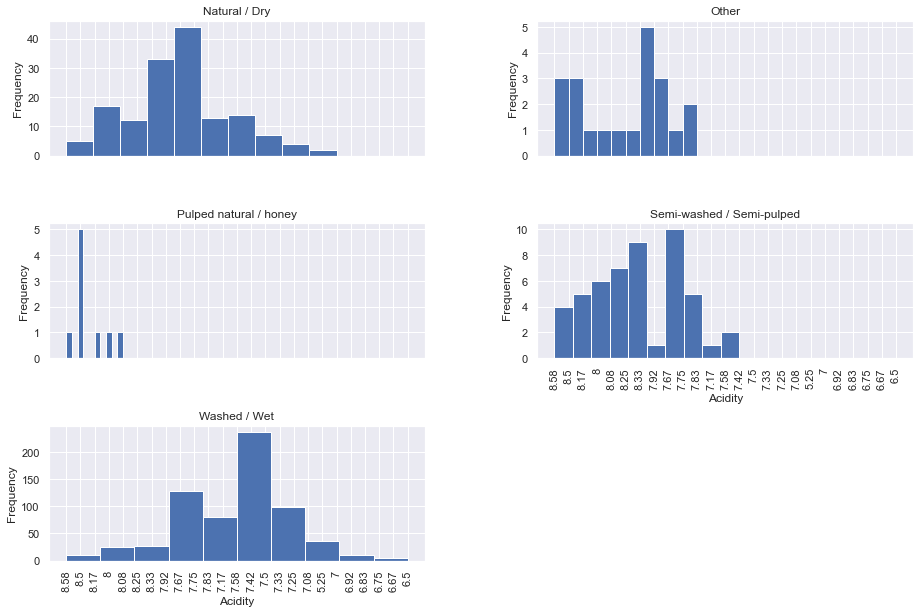

In [46]:
ax = cof_data.hist(column='Acidity', by='Processing.Method', bins=10, figsize=(15,10), sharex=True);
for axis in ax.flatten():
    axis.set_xlabel('Acidity')
    axis.set_ylabel('Frequency')

Which method brings out the body in coffee then?

The histograms look similar to each other, and most of the coffees receive 7.5 points for the body regardless of the processing method.

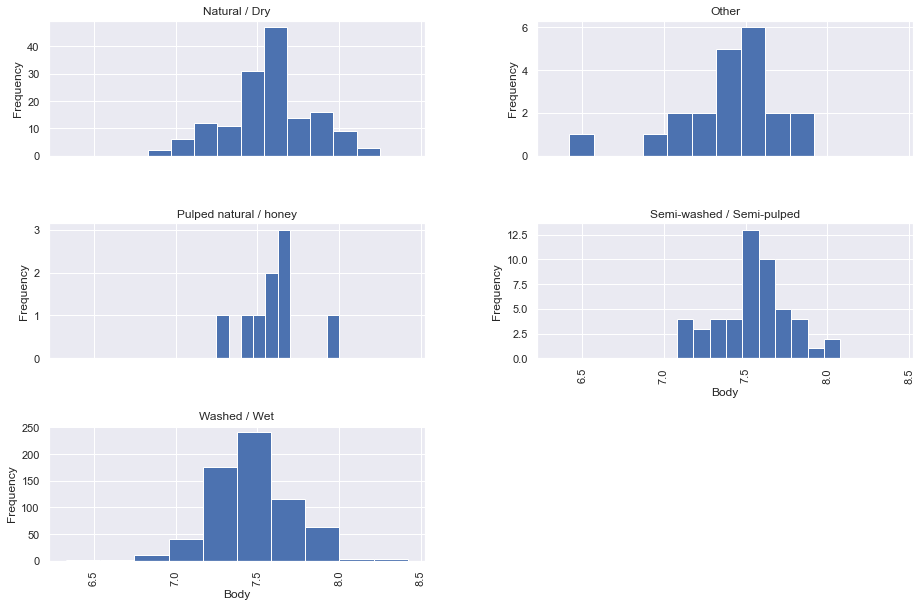

In [47]:
ax = cof_data.hist(column='Body', by='Processing.Method', bins=10, figsize=(15,10), sharex=True);
for axis in ax.flatten():
    axis.set_xlabel('Body')
    axis.set_ylabel('Frequency')

Plot correlation matrix to see if there are strong linear (positive or negative) relationships between the features.

Observations:
- there are no negative linear relationships between the data
- sweetness has the weakest linear relationship with total cupping score
- flavor and aftertaste strongly influence total cupping score (but the balance and cupper points are also very important!)

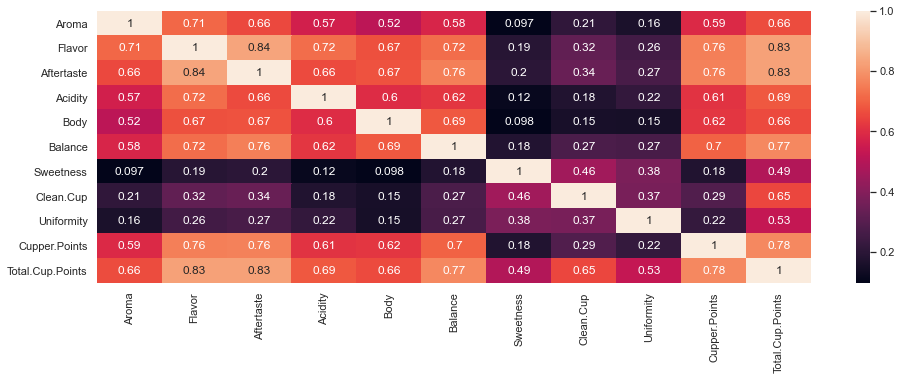

In [48]:
corrMatrix = cup_scores.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Box plot: coffee beans variety vs. total cupping score

- SL34 has the highest median value https://samplecoffee.com.au/coffee/varietals/sl34 and its quality assessment is the most consistent among the graders
- Bourbon and Typica have many large outliers
- Pacas variety has the greatest variability

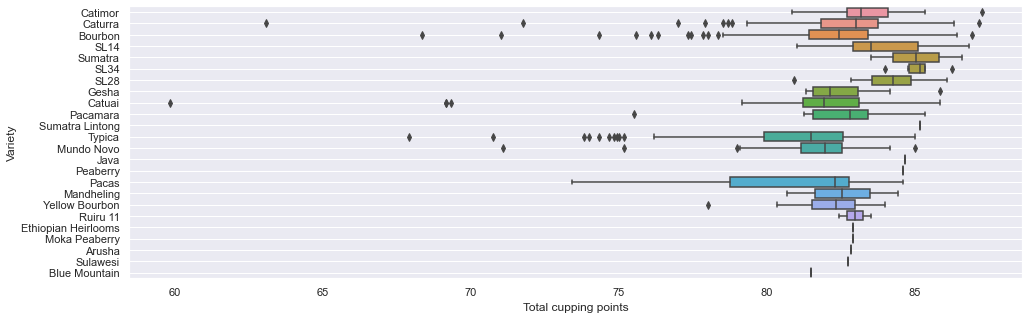

In [49]:
cof_data = cof_data[cof_data.Variety != 'Other']
cof_data['Total.Cup.Points'] = cof_data['Total.Cup.Points'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize = (16,5))
sns.boxplot(y=cof_data['Variety'], x=cof_data['Total.Cup.Points'])
plt.grid()
plt.xlabel("Total cupping points")
plt.show()

Box plot: country of origin vs. total cupping score

- Ethiopian coffee's grading is consistent, there are no outliers, and the score is high
- Coffee from Kenya is also a good one, it has the highest median value of total cupping points
- Coffees from Mexico and Haiti are characterized by the greatest variability of total cupping points

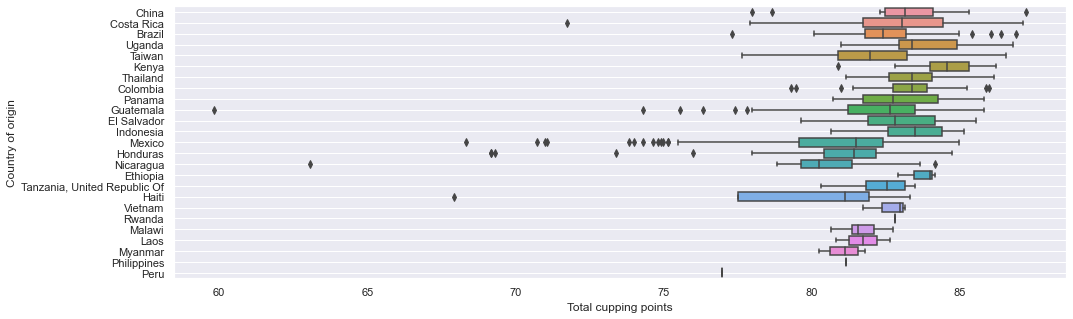

In [50]:
plt.figure(figsize = (16,5))
sns.boxplot(y=cof_data['Country.of.Origin'], x=cof_data['Total.Cup.Points']);
plt.grid()
plt.xlabel("Total cupping points")
plt.ylabel("Country of origin")
plt.show()

Use linear regression to model linear relationship between aftertaste and flavor grades.

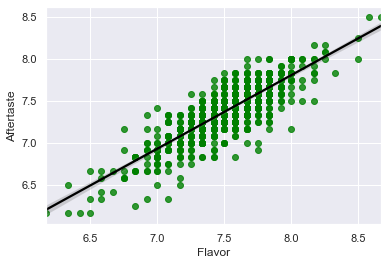

In [51]:
# Aftertaste vs. flavor quality with linear regression model fit
sns.regplot(x='Flavor', y='Aftertaste', data=cup_scores, 
            scatter_kws={"color": "green"}, line_kws={"color": "black"});

Category 1 and 2 defects lower the overall score of a specialty coffee, and quakers are the unripened beans.

If we add up the defects and plot correlation matrix again, it is observed that there is a negative linear relationship between this feature and the other ones.

Defects have the strongest negative relationships with total cupping points and aftertaste.

In [52]:
# Sum defects
def sum_defects(*args):
    return sum(args)

cof_data['sum_defects'] = cof_data.apply(lambda row: sum_defects(int(row['Category.One.Defects']), 
                                                                 int(row['Category.Two.Defects']), 
                                                                 int(row.Quakers)), axis=1)
cup_scores = cup_scores.join(cof_data['sum_defects'])

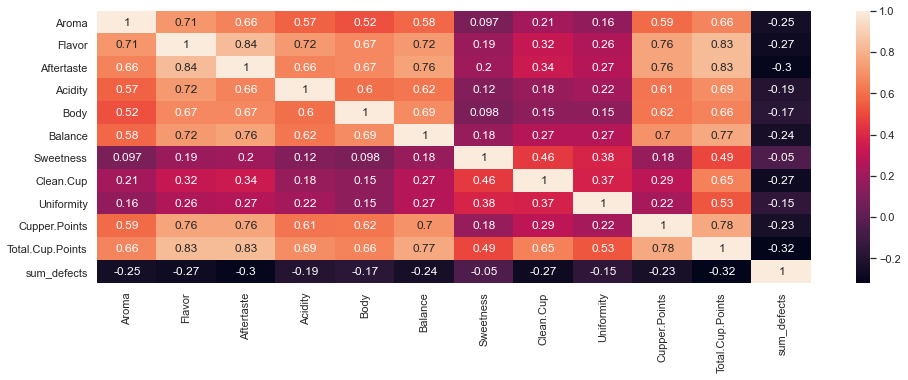

In [53]:
corrMatrix = cup_scores.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

However, the trend line seems to be affected by the outliers.

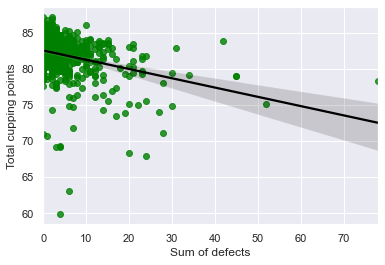

In [54]:
sns.regplot(x='sum_defects', y='Total.Cup.Points', data=cup_scores, 
            scatter_kws={"color": "green"}, line_kws={"color": "black"});
plt.xlabel("Sum of defects");
plt.ylabel("Total cupping points");

We may improve the trend line by means of robust regression, also available in the Seaborn library.

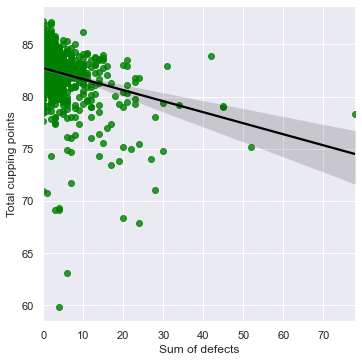

In [55]:
sns.lmplot(x='sum_defects', y='Total.Cup.Points', data=cup_scores,
           robust=True, scatter_kws={"color": "green"}, line_kws={"color": "black"});
plt.xlabel("Sum of defects");
plt.ylabel("Total cupping points");

Next I will try unsupervised learning for coffee segmentation based on the cupping scores.

First I need to normalize the numerical data using StandardScaler(). This is important as the features in the dataset may have different magnitudes and distributions. Normalization allows the equal interpretation of the features in the math-based algorithms.

In [56]:
cup_scores = cup_scores.iloc[:,0:9] # I'm using numerical data
st_cup_scores = StandardScaler().fit_transform(cup_scores)
pd_scores = pd.DataFrame(st_cup_scores) # I'm converting to pandas dataframe for a better visualization of data
pd_scores

,0,1,2,3,4,5,6,7,8
0,4.038671,3.753815,3.477245,3.543592,3.496673,2.781656,0.146660,0.197258,0.291439
1,2.343561,3.206537,2.705484,3.277256,3.496673,2.513136,0.146660,0.197258,0.291439
2,1.767224,3.464079,3.477245,3.277256,0.666712,2.781656,0.146660,0.197258,0.291439
3,2.919898,2.401716,2.180687,2.178621,1.610032,1.528562,0.146660,0.197258,0.291439
4,1.496006,2.401716,2.180687,3.277256,2.855215,1.528562,0.146660,0.197258,0.291439
...,...,...,...,...,...,...,...,...,...
884,-1.894214,-3.779308,-3.715562,-3.381139,-3.106569,-3.931349,-4.616121,-2.392832,-4.221521
885,-1.622996,-2.169667,-3.468598,-0.318277,-0.918066,-2.200886,0.146660,-12.753192,0.291439
886,-2.741769,-2.974488,-2.943801,-2.815176,-1.559524,-2.439570,-9.378903,-4.982922,-1.220403
887,-1.046659,-2.974488,-3.221635,-4.213439,-4.049889,-4.199870,-9.378903,-4.982922,-8.734480


Let's check the distribution of one of the standardized features.

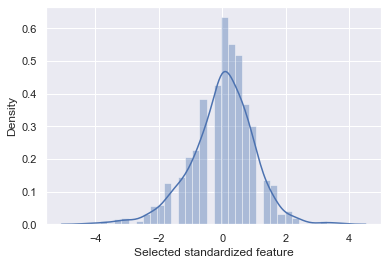

In [57]:
sns.distplot(pd_scores[1]);
plt.xlabel("Selected standardized feature");

I want to have 3 groups of coffee, so I define 3 clusters.

As we can see from the mean values of numerical features grouped by cluster number, the coffees were divided into three clusters characterized by three degrees of quality. 

Coffees labeled as '0' seem to be the finest ones. Most of the coffees are in this cluster, which means that the quality of graded coffees was high in general. There are only 26 coffees in cluster '2'.

In [58]:
clusters = 3 
model = KMeans(init = 'k-means++', n_clusters = clusters)
model.fit(st_cup_scores)
labels = model.labels_ # There are three labels: 0, 1, 2 - each for a different cluster
cup_scores['cluster_number'] = labels
cup_scores.groupby('cluster_number').describe() 

Aroma                                                    \
                count      mean       std   min   25%   50%   75%   max   
cluster_number                                                            
0               377.0  7.379761  0.233172  5.08  7.25  7.42  7.50  8.00   
1                26.0  7.083846  0.370233  6.33  6.92  7.04  7.31  7.92   
2               486.0  7.722963  0.215055  7.08  7.58  7.67  7.83  8.75   

               Flavor            ... Clean.Cup       Uniformity            \
                count      mean  ...       75%   max      count      mean   
cluster_number                   ...                                        
0               377.0  7.299363  ...      10.0  10.0      377.0  9.872440   
1                26.0  6.820769  ...       8.0  10.0       26.0  8.718462   
2               486.0  7.699218  ...      10.0  10.0      486.0  9.931255   

                                                         
                     std   min   25%    50%   75%   max  
cluster_number                                           
0               0.392571  6.67  10.0  10.00  10.0  10.0  
1               1.176308  6.00   8.0   8.67  10.0  10.0  
2               0.307155  6.67  10.0  10.00  10.0  10.0  

[3 rows x 72 columns]

We can see on the 2D plot how for two selected features coffees were clustered.

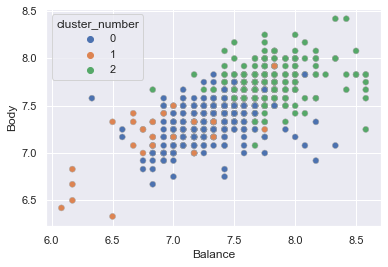

In [59]:
sns.scatterplot('Balance', 'Body', 
                data = cup_scores, 
                hue = 'cluster_number', 
                palette = 'deep', 
                alpha = 1, 
                edgecolor = 'darkgrey',
                legend = 'full');

We can also display 3D plot, for three selected features.

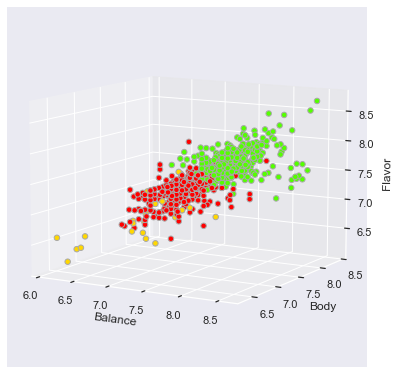

In [60]:
fig = plt.figure(figsize = (16,5))
ax = Axes3D(fig, elev = 10)
ax.scatter(cup_scores['Balance'], cup_scores['Body'], cup_scores['Flavor'], 
           c = cup_scores['cluster_number'], 
           s = 30, # marker size
           cmap = 'prism', # sequence of colors
           edgecolor = 'darkgrey', # color of a marker edge,
           alpha = 1,
          )
ax.set_xlabel('Balance')
ax.set_ylabel('Body')
ax.set_zlabel('Flavor')
plt.show()

As we can see, there is a lot of good coffee out there :)